In [37]:
import pandas as pd 
import seaborn as sns 
true = pd.read_csv('./data/True.csv')
fake = pd.read_csv('./data/Fake.csv')
# true.head()

In [38]:
# true = true.head(5)
# true.tail()


In [39]:
# true = true.head(5)
# true.tail()

In [40]:
# fake = fake.head(5)
# fake.tail()

In [41]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [42]:
true ['label'] = 1 
fake ['label'] = 0 
frames = [true.loc[:][:], fake.loc[:][:]]
df = pd.concat(frames)
df.tail()

,title,text,subject,date,label
23445,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,16/1/16,0
23446,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,16/1/16,0
23447,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,15/1/16,0
23448,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,14/1/16,0
23449,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,12/1/16,0


In [43]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


<Axes: xlabel='label', ylabel='count'>

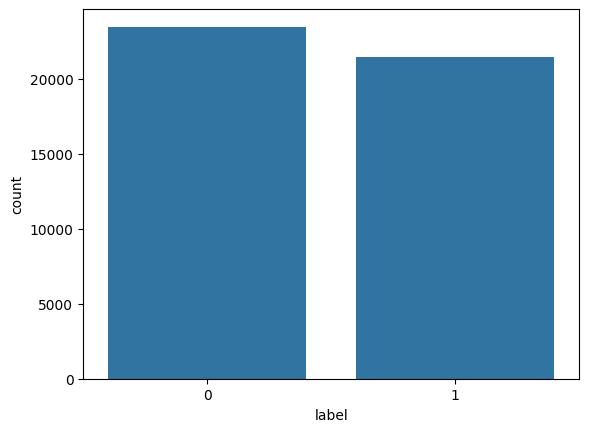

In [44]:
sns.countplot(data = df, x = 'label')

<Axes: xlabel='Year', ylabel='count'>

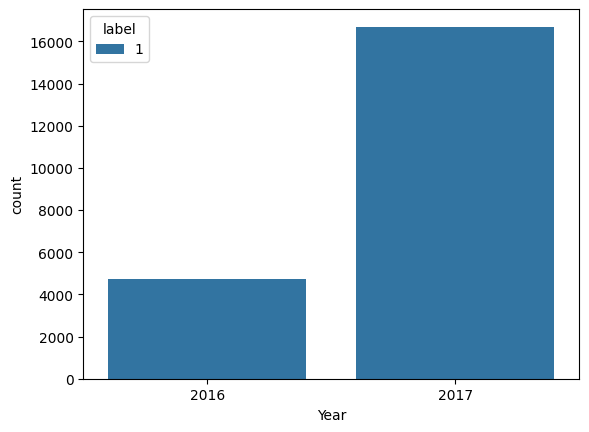

In [45]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df = df.dropna(subset=["date"])
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
sns.countplot(data = df, x = "Year", hue = "label")

<Axes: xlabel='Year', ylabel='count'>

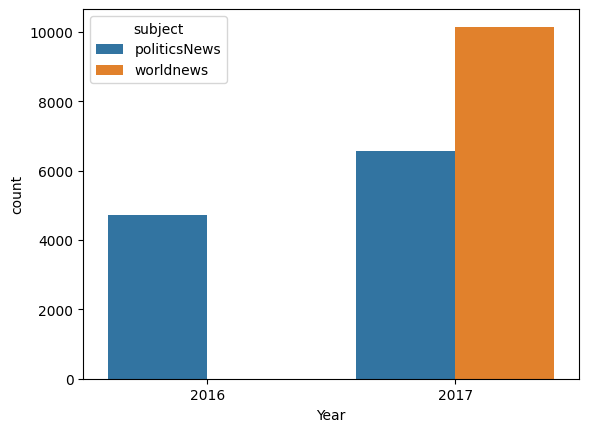

In [46]:
sns.countplot(data = df, x = "Year", hue = "subject")

In [48]:
fames = [true.head(200), fake.head(200)]
df = pd.concat(frames)
X = df.drop('label', axis = 1)
y = df ['label']

In [49]:
df = df.dropna()
df2 = df.copy()
df2.reset_index(inplace = True)
df2.tail

<bound method NDFrame.tail of        index                                              title  \
0          0  As U.S. budget fight looms, Republicans flip t...   
1          1  U.S. military to accept transgender recruits o...   
2          2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3          3  FBI Russia probe helped by Australian diplomat...   
4          4  Trump wants Postal Service to charge 'much mor...   
...      ...                                                ...   
44862  23445  McPain: John McCain Furious That Iran Treated ...   
44863  23446  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44864  23447  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44865  23448  How to Blow $700 Million: Al Jazeera America F...   
44866  23449  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON

In [50]:
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
import re 
import nltk 

nltk.download('stopwords')
ps = PorterStemmer()
corpus = []
for i in range(0, len(df2)) : 
    review = re.sub('[^a-zA-Z]', '', df2['text'][i])
    review = review.lower()
    review = review.split()
    revoew = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ''.join(review)
    corpus.append(review)
    

[nltk_data] Downloading package stopwords to /Users/Milly/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer()
X = tfidf_v.fit_transform(corpus).toarray()
y = df2['label']
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy : %0.3f" % score)

Accuracy : 0.542


Text(0.5, 1.0, 'Confusion Matrix')

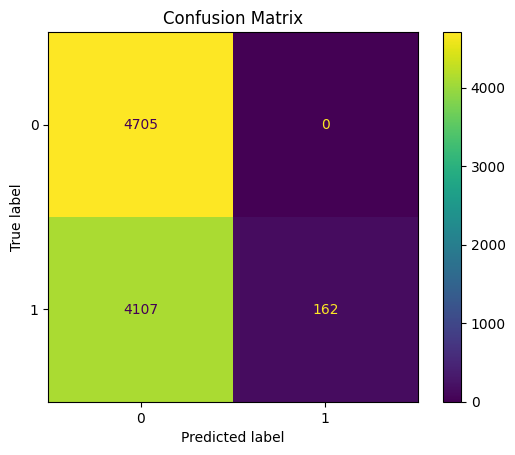

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title("Confusion Matrix")

In [56]:
import pickle 
pickle.dump(classifier, open('model2.pkl', 'wb'))
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

In [57]:
model = pickle.load(open('model2.pkl', 'rb'))
tfidfvect = pickle.load(open('tfidfvect2.pkl', 'rb'))

In [58]:
def predict(text) : 
    review = re.sub('[^a-zA-Z]', '', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ''.join(review)
    review_vect = tfidfvect.transform([review]).toarray()
    prediction = 'FAKE' if model.predict(review_vect) == 0 else 'REAL'
    return prediction

In [59]:
text = "Former CIA Openly Suggests He's Like A Dictator"
prediction = predict(text)
print(prediction)

FAKE
